In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline


In [2]:
batting_2018 = pd.read_csv("../Resources/2018Batting.csv")
fielding_2018 = pd.read_csv("../Resources/2018Fielding.csv")
pitching_2018 = pd.read_csv("../Resources/2018Pitching.csv")

In [3]:
batfield_2018 = pd.merge(batting_2018, fielding_2018, on='Tm')

full_2018 = pd.merge(batfield_2018, pitching_2018, on='Tm')

full_2018

,Tm,#Bat,BatAge,R/G,G_x,PA,AB,R_x,H_x,2B,...,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB_y
0,Arizona Diamondbacks,49,29.2,4.28,162,6157,5460,693,1283,259,...,6139,113,3.91,1.254,8.1,1.1,3.2,8.9,2.77,1106
1,Atlanta Braves,58,27.3,4.69,162,6251,5582,759,1433,314,...,6155,110,3.98,1.284,7.6,0.9,3.9,8.8,2.24,1128
2,Baltimore Orioles,56,28.4,3.84,162,6034,5507,622,1317,242,...,6340,83,4.98,1.496,9.8,1.5,3.7,7.6,2.04,1155
3,Boston Red Sox,44,27.7,5.41,162,6302,5623,876,1509,355,...,6166,118,3.82,1.246,8.1,1.1,3.2,9.6,3.04,1143
4,Chicago Cubs,50,27.2,4.67,163,6369,5624,761,1453,286,...,6264,115,4.13,1.315,8.0,1.0,3.8,8.1,2.14,1190
5,Chicago White Sox,51,26.5,4.05,162,6071,5523,656,1332,259,...,6339,88,4.73,1.431,8.8,1.2,4.1,7.9,1.93,1180
6,Cincinnati Reds,53,27.2,4.30,162,6240,5532,696,1404,251,...,6279,90,4.66,1.404,9.3,1.4,3.3,7.9,2.36,1137
7,Cleveland Indians,49,29.4,5.05,162,6300,5595,818,1447,297,...,6071,115,3.78,1.205,8.3,1.2,2.5,9.5,3.79,1051
8,Colorado Rockies,41,28.7,4.79,163,6178,5541,780,1418,280,...,6154,109,4.06,1.310,8.5,1.1,3.3,8.7,2.68,1052
9,Detroit Tigers,49,27.9,3.89,162,6029,5494,630,1326,284,...,6130,98,4.58,1.343,9.0,1.4,3.1,7.7,2.47,1058


In [4]:
print(full_2018['Tm'].values)

['Arizona Diamondbacks' 'Atlanta Braves' 'Baltimore Orioles'
 'Boston Red Sox' 'Chicago Cubs' 'Chicago White Sox' 'Cincinnati Reds'
 'Cleveland Indians' 'Colorado Rockies' 'Detroit Tigers' 'Houston Astros'
 'Kansas City Royals' 'Los Angeles Angels' 'Los Angeles Dodgers'
 'Miami Marlins' 'Milwaukee Brewers' 'Minnesota Twins' 'New York Mets'
 'New York Yankees' 'Oakland Athletics' 'Philadelphia Phillies'
 'Pittsburgh Pirates' 'San Diego Padres' 'Seattle Mariners'
 'San Francisco Giants' 'St. Louis Cardinals' 'Tampa Bay Rays'
 'Texas Rangers' 'Toronto Blue Jays' 'Washington Nationals'
 'League Average' nan]


In [5]:
def playoff_teams(Tm):
    if Tm in ['Chicago Cubs', 'Colorado Rockies', 'Oakland Athletics', 'New York Yankees','Los Angeles Dodgers', 'Atlanta Braves','Milwaukee Brewers', 'Houston Astros', 'Cleveland Indians','Boston Red Sox']:
        return 'Yes'
    else:
        return 'No'

# Apply the function to create a new column 'Category' based on 'Fruit' column
full_2018['playoffs'] = full_2018['Tm'].apply(playoff_teams)

full_2018

,Tm,#Bat,BatAge,R/G,G_x,PA,AB,R_x,H_x,2B,...,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB_y,playoffs
0,Arizona Diamondbacks,49,29.2,4.28,162,6157,5460,693,1283,259,...,113,3.91,1.254,8.1,1.1,3.2,8.9,2.77,1106,No
1,Atlanta Braves,58,27.3,4.69,162,6251,5582,759,1433,314,...,110,3.98,1.284,7.6,0.9,3.9,8.8,2.24,1128,Yes
2,Baltimore Orioles,56,28.4,3.84,162,6034,5507,622,1317,242,...,83,4.98,1.496,9.8,1.5,3.7,7.6,2.04,1155,No
3,Boston Red Sox,44,27.7,5.41,162,6302,5623,876,1509,355,...,118,3.82,1.246,8.1,1.1,3.2,9.6,3.04,1143,Yes
4,Chicago Cubs,50,27.2,4.67,163,6369,5624,761,1453,286,...,115,4.13,1.315,8.0,1.0,3.8,8.1,2.14,1190,Yes
5,Chicago White Sox,51,26.5,4.05,162,6071,5523,656,1332,259,...,88,4.73,1.431,8.8,1.2,4.1,7.9,1.93,1180,No
6,Cincinnati Reds,53,27.2,4.30,162,6240,5532,696,1404,251,...,90,4.66,1.404,9.3,1.4,3.3,7.9,2.36,1137,No
7,Cleveland Indians,49,29.4,5.05,162,6300,5595,818,1447,297,...,115,3.78,1.205,8.3,1.2,2.5,9.5,3.79,1051,Yes
8,Colorado Rockies,41,28.7,4.79,163,6178,5541,780,1418,280,...,109,4.06,1.310,8.5,1.1,3.3,8.7,2.68,1052,Yes
9,Detroit Tigers,49,27.9,3.89,162,6029,5494,630,1326,284,...,98,4.58,1.343,9.0,1.4,3.1,7.7,2.47,1058,No


In [6]:
full_2018.set_index('Tm', inplace=True)

full_2018

,#Bat,BatAge,R/G,G_x,PA,AB,R_x,H_x,2B,3B,...,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB_y,playoffs
Tm,,,,,,,,,,,,,,,,,,,,,
Arizona Diamondbacks,49,29.2,4.28,162,6157,5460,693,1283,259,50,...,113,3.91,1.254,8.1,1.1,3.2,8.9,2.77,1106,No
Atlanta Braves,58,27.3,4.69,162,6251,5582,759,1433,314,29,...,110,3.98,1.284,7.6,0.9,3.9,8.8,2.24,1128,Yes
Baltimore Orioles,56,28.4,3.84,162,6034,5507,622,1317,242,15,...,83,4.98,1.496,9.8,1.5,3.7,7.6,2.04,1155,No
Boston Red Sox,44,27.7,5.41,162,6302,5623,876,1509,355,31,...,118,3.82,1.246,8.1,1.1,3.2,9.6,3.04,1143,Yes
Chicago Cubs,50,27.2,4.67,163,6369,5624,761,1453,286,34,...,115,4.13,1.315,8.0,1.0,3.8,8.1,2.14,1190,Yes
Chicago White Sox,51,26.5,4.05,162,6071,5523,656,1332,259,40,...,88,4.73,1.431,8.8,1.2,4.1,7.9,1.93,1180,No
Cincinnati Reds,53,27.2,4.30,162,6240,5532,696,1404,251,25,...,90,4.66,1.404,9.3,1.4,3.3,7.9,2.36,1137,No
Cleveland Indians,49,29.4,5.05,162,6300,5595,818,1447,297,19,...,115,3.78,1.205,8.3,1.2,2.5,9.5,3.79,1051,Yes
Colorado Rockies,41,28.7,4.79,163,6178,5541,780,1418,280,42,...,109,4.06,1.310,8.5,1.1,3.3,8.7,2.68,1052,Yes


In [7]:
full_2018.dtypes

#Bat          int64
BatAge      float64
R/G         float64
G_x           int64
PA            int64
             ...   
BB9         float64
SO9         float64
SO/W        float64
LOB_y         int64
playoffs     object
Length: 82, dtype: object

In [8]:
columns_to_convert = full_2018.columns.difference(['playoffs'])
float_2018 = full_2018[columns_to_convert].astype(float)

float_2018

,#Bat,#Fld,#P,2B,3B,A,AB,BA,BB9,BB_x,...,SO_x,SO_y,SV,TB,W,W-L%,WHIP,WP,cSho,tSho
Tm,,,,,,,,,,,,,,,,,,,,,
Arizona Diamondbacks,49.0,49.0,30.0,259.0,50.0,1686.0,5460.0,0.235,3.2,560.0,...,1460.0,1448.0,39.0,2170.0,82.0,0.506,1.254,69.0,1.0,9.0
Atlanta Braves,58.0,57.0,35.0,314.0,29.0,1439.0,5582.0,0.257,3.9,511.0,...,1290.0,1423.0,40.0,2330.0,90.0,0.556,1.284,61.0,1.0,11.0
Baltimore Orioles,56.0,56.0,30.0,242.0,15.0,1537.0,5507.0,0.239,3.7,422.0,...,1412.0,1203.0,28.0,2153.0,47.0,0.290,1.496,81.0,0.0,7.0
Boston Red Sox,44.0,43.0,23.0,355.0,31.0,1366.0,5623.0,0.268,3.2,569.0,...,1253.0,1558.0,46.0,2550.0,108.0,0.667,1.246,51.0,0.0,14.0
Chicago Cubs,50.0,50.0,35.0,286.0,34.0,1675.0,5624.0,0.258,3.8,576.0,...,1388.0,1333.0,46.0,2308.0,95.0,0.583,1.315,46.0,0.0,18.0
Chicago White Sox,51.0,51.0,31.0,259.0,40.0,1431.0,5523.0,0.241,4.1,425.0,...,1594.0,1259.0,34.0,2217.0,62.0,0.383,1.431,94.0,0.0,8.0
Cincinnati Reds,53.0,53.0,32.0,251.0,25.0,1608.0,5532.0,0.254,3.3,559.0,...,1376.0,1258.0,38.0,2221.0,67.0,0.414,1.404,48.0,0.0,6.0
Cleveland Indians,49.0,48.0,27.0,297.0,19.0,1353.0,5595.0,0.259,2.5,554.0,...,1189.0,1544.0,41.0,2430.0,91.0,0.562,1.205,54.0,2.0,17.0
Colorado Rockies,41.0,41.0,21.0,280.0,42.0,1624.0,5541.0,0.256,3.3,507.0,...,1397.0,1409.0,51.0,2412.0,91.0,0.558,1.310,70.0,0.0,10.0


In [9]:
scaler = StandardScaler()

scaled_2018 = scaler.fit_transform(float_2018)

scaled_2018 = pd.DataFrame(scaled_2018, columns=float_2018.columns)

scaled_2018.index = float_2018.index

scaled_2018

,#Bat,#Fld,#P,2B,3B,A,AB,BA,BB9,BB_x,...,SO_x,SO_y,SV,TB,W,W-L%,WHIP,WP,cSho,tSho
Tm,,,,,,,,,,,,,,,,,,,,,
Arizona Diamondbacks,-0.187943,-0.187401,-0.177846,-0.191403,-0.026712,-0.153315,-0.181560,-1.503177,-0.130466,-0.165488,...,-0.167121,-0.168838,-0.191227,-0.187292,-0.177135,0.070472,-0.577206,-0.155515,-0.066770,-0.205458
Atlanta Braves,-0.149002,-0.152712,-0.140503,-0.151841,-0.173849,-0.186197,-0.177175,1.071608,1.696053,-0.184056,...,-0.191647,-0.172444,-0.186450,-0.173248,-0.157580,0.651680,-0.233460,-0.181233,-0.066770,-0.167454
Baltimore Orioles,-0.157656,-0.157048,-0.177846,-0.203631,-0.271941,-0.173151,-0.179871,-1.035034,1.174191,-0.217781,...,-0.174046,-0.204181,-0.243774,-0.188784,-0.262685,-2.440351,2.195674,-0.116937,-0.372003,-0.243462
Boston Red Sox,-0.209577,-0.213418,-0.230127,-0.122349,-0.159836,-0.195916,-0.175702,2.359000,-0.130466,-0.162078,...,-0.196985,-0.152969,-0.157789,-0.153937,-0.113583,1.941964,-0.668871,-0.213381,-0.372003,-0.110449
Chicago Cubs,-0.183616,-0.183065,-0.140503,-0.171981,-0.138817,-0.154780,-0.175666,1.188643,1.435122,-0.159425,...,-0.177508,-0.185428,-0.157789,-0.175179,-0.145359,0.965533,0.121743,-0.229455,-0.372003,-0.034441
Chicago White Sox,-0.179290,-0.178729,-0.170378,-0.191403,-0.096778,-0.187262,-0.179295,-0.800963,2.217915,-0.216644,...,-0.147788,-0.196103,-0.215112,-0.183166,-0.226020,-1.359302,1.450892,-0.075145,-0.372003,-0.224460
Cincinnati Reds,-0.170636,-0.170057,-0.162909,-0.197157,-0.201876,-0.163699,-0.178972,0.720501,0.130466,-0.165867,...,-0.179239,-0.196247,-0.196004,-0.182815,-0.213799,-0.998953,1.141521,-0.223025,-0.372003,-0.262464
Cleveland Indians,-0.187943,-0.191737,-0.200252,-0.164069,-0.243915,-0.197646,-0.176708,1.305679,-1.956984,-0.167762,...,-0.206218,-0.154989,-0.181673,-0.164470,-0.155136,0.721426,-1.138657,-0.203736,0.238463,-0.053443
Colorado Rockies,-0.222557,-0.222090,-0.245064,-0.176297,-0.082765,-0.161569,-0.178649,0.954572,0.130466,-0.185572,...,-0.176210,-0.174464,-0.133904,-0.166050,-0.155136,0.674929,0.064452,-0.152300,-0.372003,-0.186456


In [10]:
playoff_dummies = pd.get_dummies(full_2018["playoffs"])

playoff_dummies

,No,Yes
Tm,,
Arizona Diamondbacks,True,False
Atlanta Braves,False,True
Baltimore Orioles,True,False
Boston Red Sox,False,True
Chicago Cubs,False,True
Chicago White Sox,True,False
Cincinnati Reds,True,False
Cleveland Indians,False,True
Colorado Rockies,False,True


In [11]:
scaled_dummied_2018 = pd.concat([scaled_2018, playoff_dummies], axis=1)

scaled_dummied_2018

,#Bat,#Fld,#P,2B,3B,A,AB,BA,BB9,BB_x,...,SV,TB,W,W-L%,WHIP,WP,cSho,tSho,No,Yes
Tm,,,,,,,,,,,,,,,,,,,,,
Arizona Diamondbacks,-0.187943,-0.187401,-0.177846,-0.191403,-0.026712,-0.153315,-0.181560,-1.503177,-0.130466,-0.165488,...,-0.191227,-0.187292,-0.177135,0.070472,-0.577206,-0.155515,-0.066770,-0.205458,True,False
Atlanta Braves,-0.149002,-0.152712,-0.140503,-0.151841,-0.173849,-0.186197,-0.177175,1.071608,1.696053,-0.184056,...,-0.186450,-0.173248,-0.157580,0.651680,-0.233460,-0.181233,-0.066770,-0.167454,False,True
Baltimore Orioles,-0.157656,-0.157048,-0.177846,-0.203631,-0.271941,-0.173151,-0.179871,-1.035034,1.174191,-0.217781,...,-0.243774,-0.188784,-0.262685,-2.440351,2.195674,-0.116937,-0.372003,-0.243462,True,False
Boston Red Sox,-0.209577,-0.213418,-0.230127,-0.122349,-0.159836,-0.195916,-0.175702,2.359000,-0.130466,-0.162078,...,-0.157789,-0.153937,-0.113583,1.941964,-0.668871,-0.213381,-0.372003,-0.110449,False,True
Chicago Cubs,-0.183616,-0.183065,-0.140503,-0.171981,-0.138817,-0.154780,-0.175666,1.188643,1.435122,-0.159425,...,-0.157789,-0.175179,-0.145359,0.965533,0.121743,-0.229455,-0.372003,-0.034441,False,True
Chicago White Sox,-0.179290,-0.178729,-0.170378,-0.191403,-0.096778,-0.187262,-0.179295,-0.800963,2.217915,-0.216644,...,-0.215112,-0.183166,-0.226020,-1.359302,1.450892,-0.075145,-0.372003,-0.224460,True,False
Cincinnati Reds,-0.170636,-0.170057,-0.162909,-0.197157,-0.201876,-0.163699,-0.178972,0.720501,0.130466,-0.165867,...,-0.196004,-0.182815,-0.213799,-0.998953,1.141521,-0.223025,-0.372003,-0.262464,True,False
Cleveland Indians,-0.187943,-0.191737,-0.200252,-0.164069,-0.243915,-0.197646,-0.176708,1.305679,-1.956984,-0.167762,...,-0.181673,-0.164470,-0.155136,0.721426,-1.138657,-0.203736,0.238463,-0.053443,False,True
Colorado Rockies,-0.222557,-0.222090,-0.245064,-0.176297,-0.082765,-0.161569,-0.178649,0.954572,0.130466,-0.185572,...,-0.133904,-0.166050,-0.155136,0.674929,0.064452,-0.152300,-0.372003,-0.186456,False,True


In [12]:
# Define features set
X = scaled_dummied_2018.copy()
X.drop("Yes", axis=1, inplace=True)
X.head()

,#Bat,#Fld,#P,2B,3B,A,AB,BA,BB9,BB_x,...,SO_y,SV,TB,W,W-L%,WHIP,WP,cSho,tSho,No
Tm,,,,,,,,,,,,,,,,,,,,,
Arizona Diamondbacks,-0.187943,-0.187401,-0.177846,-0.191403,-0.026712,-0.153315,-0.181560,-1.503177,-0.130466,-0.165488,...,-0.168838,-0.191227,-0.187292,-0.177135,0.070472,-0.577206,-0.155515,-0.066770,-0.205458,True
Atlanta Braves,-0.149002,-0.152712,-0.140503,-0.151841,-0.173849,-0.186197,-0.177175,1.071608,1.696053,-0.184056,...,-0.172444,-0.186450,-0.173248,-0.157580,0.651680,-0.233460,-0.181233,-0.066770,-0.167454,False
Baltimore Orioles,-0.157656,-0.157048,-0.177846,-0.203631,-0.271941,-0.173151,-0.179871,-1.035034,1.174191,-0.217781,...,-0.204181,-0.243774,-0.188784,-0.262685,-2.440351,2.195674,-0.116937,-0.372003,-0.243462,True
Boston Red Sox,-0.209577,-0.213418,-0.230127,-0.122349,-0.159836,-0.195916,-0.175702,2.359000,-0.130466,-0.162078,...,-0.152969,-0.157789,-0.153937,-0.113583,1.941964,-0.668871,-0.213381,-0.372003,-0.110449,False
Chicago Cubs,-0.183616,-0.183065,-0.140503,-0.171981,-0.138817,-0.154780,-0.175666,1.188643,1.435122,-0.159425,...,-0.185428,-0.157789,-0.175179,-0.145359,0.965533,0.121743,-0.229455,-0.372003,-0.034441,False


In [13]:
# Define target vector
y = scaled_dummied_2018["Yes"].ravel()
y[:5]

array([False,  True, False,  True,  True])

In [14]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [15]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [16]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [17]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [18]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [19]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

## Making Predictions Using the Random Forest Model

In [20]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [21]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [22]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,2,1
Actual 1,0,5


Accuracy Score : 0.875
Classification Report
              precision    recall  f1-score   support

       False       1.00      0.67      0.80         3
        True       0.83      1.00      0.91         5

    accuracy                           0.88         8
   macro avg       0.92      0.83      0.85         8
weighted avg       0.90      0.88      0.87         8



## Feature Importance

In [23]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.07737257366289624, 'H_x'),
 (0.06877975942340007, 'L'),
 (0.06231815306767868, 'W-L%'),
 (0.05934970194911438, 'OPS'),
 (0.05262767439125674, 'R_x'),
 (0.05100980991647184, 'No'),
 (0.050583051556785705, 'TB'),
 (0.0444002726710207, 'W'),
 (0.04081020746566769, 'SLG'),
 (0.03695977966738478, 'AB'),
 (0.035552564134158054, 'RBI'),
 (0.031815012237338215, 'BA'),
 (0.028442679278842267, 'Rtot'),
 (0.028219877084959624, 'OBP'),
 (0.025906412572746337, 'R/G'),
 (0.023387512853454195, 'ERA'),
 (0.023385075592206324, 'ERA+'),
 (0.022725009956192754, 'Rtot/yr'),
 (0.017878709808101807, 'R_y'),
 (0.017206322257256042, 'PA'),
 (0.01675647744888167, 'RA/G_y'),
 (0.015492707346868365, 'H_y'),
 (0.01536289865264719, 'HR_x'),
 (0.013739788437369081, 'OPS+'),
 (0.01242869388842124, 'tSho'),
 (0.011659744118360417, 'H9'),
 (0.008082085880947361, '2B'),
 (0.008024092489287735, 'RA/G_x'),
 (0.007912927479990298, 'IP'),
 (0.0066244239631336405, '#Bat'),
 (0.006513258953836203, 'HBP_x'),
 (0.006204245

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

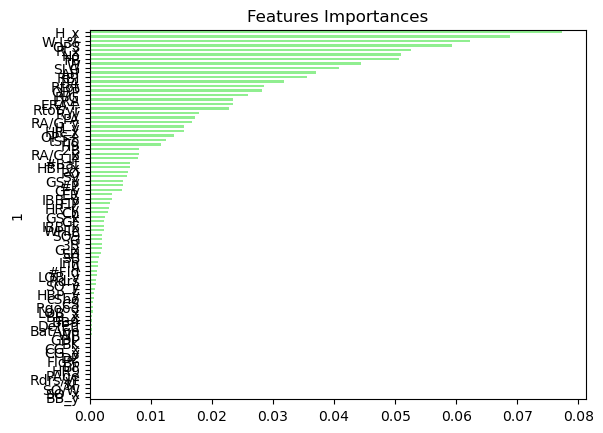

In [24]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)